<a href="https://colab.research.google.com/github/renatojmf/Aspects-Extraction-in-Portuguese/blob/main/CAt_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-Processamento

In [ ]:
! pip install stanza
! pip install unidecode

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import stanza as st
import pandas as pd
st.download('pt') # download pt model
nlp = st.Pipeline('pt') # initialize pt neural pipeline

In [68]:
import json
tvs = json.load(open("/content/tv.json"))

In [69]:
texts = []
aspectsClass = []
for x in tvs['reviews']:
  texts.append(x['review'])
  y = x['implicit aspects']
  if(len(y) > 0):
    aspectsClass.append(y[0])
  else:
    aspectsClass.append(None)

d = {'text': texts, 'aspectsClass':aspectsClass}

In [70]:
print(len(texts))
print(len(aspectsClass))
for x in aspectsClass[0:20]:
  print(x)

1091
1091
entrega
produto
None
funcionalidades
None
None
None
None
None
None
None
produto
produto
desempenho
produto
peso
None
None
produto
None


In [71]:
df_tvs = pd.DataFrame(data=d)

In [72]:
df_tvs.head()

,text,aspectsClass
0,Excelente smart tv. E foi entregue vem antes d...,entrega
1,"Imagem ótima recursos de web bons , recomendo ...",produto
2,"produto ótimo, entrega antes do prazo previsto...",None
3,"Muito bom o produto, esta tv está entre as das...",funcionalidades
4,a entrega foi super rápido... muito antes do p...,None


In [73]:
values = [None, 'None']
df = df_tvs[df_tvs.aspectsClass.isin(values) == False]

In [74]:
df.head()

,text,aspectsClass
0,Excelente smart tv. E foi entregue vem antes d...,entrega
1,"Imagem ótima recursos de web bons , recomendo ...",produto
3,"Muito bom o produto, esta tv está entre as das...",funcionalidades
11,Todos os aparelhos samsung são de uma qualidad...,produto
12,"Atendeu todas as expectativas, recomendo Samsu...",produto


In [75]:
print(len(df_tvs),(len(df)))

1091 595


In [32]:
df = pd.read_csv('/content/restaurantes.csv',sep=';')

#passar apenas os textos/frases para a função
def getCoNLLU(df):
  dicts = []
  for texto in df:
    doc = nlp(texto) # doc is class Document
    dicts.append(doc.to_dict())

  return dicts

In [33]:
from unidecode import unidecode
import re

words = []

for word in df['text']:
  old_string = unidecode(word)
  new_string = re.sub(r"[^a-zA-Z0-9]"," ",old_string)
  words.append(new_string.lower())

In [34]:
df['text'] = words

In [35]:
df.head()

,text,aspects,aspectsClass
0,hamburgueria artesanal com tempero diferenciad...,tempero,Food
1,excelente peixe para quem esta localizado no ...,peixe,Food
2,serve lanches e cerveja gelada tem mesinhas f...,cerveja,Drinks
3,muito bom o atendimento,atendimento,Service
4,cardapio variado,Cardápio,Food


In [36]:
dicts = getCoNLLU(df['text'])

saida = ''
for sentenca in dicts[0:2]:
  for tokens in sentenca:
    for tks in tokens:
      for tag in tks:
        #print("tag:" ,tag)
        saida += str(tks[tag])  + "\t"
      saida +="\n"
    saida +="\n"
  saida +="\n"


print(saida)

/usr/local/lib/python3.7/dist-packages/stanza/models/common/beam.py:86: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  prevK = bestScoresId // numWords


1	hamburgueria	hamburgueria	NOUN	Gender=Fem|Number=Sing	11	nsubj	0	12	
2	artesanal	artesanal	ADJ	Gender=Fem|Number=Sing	1	amod	13	22	
3	com	com	ADP	4	case	23	26	
4	tempero	tempero	NOUN	Gender=Masc|Number=Sing	1	nmod	27	34	
5	diferenciado	diferenciar	VERB	Gender=Masc|Number=Sing|VerbForm=Part	4	acl	35	47	
6	de	de	ADP	8	case	49	51	
7	primeira	primeiro	ADJ	Gender=Fem|NumType=Ord|Number=Sing	8	amod	52	60	
8	qualidade	qualidade	NOUN	Gender=Fem|Number=Sing	4	nmod	61	70	
9	fora	ser	AUX	Mood=Ind|Number=Sing|Person=3|Tense=Pqp|VerbForm=Fin	11	cop	72	76	
10	o	o	DET	Definite=Def|Gender=Masc|Number=Sing|PronType=Art	11	det	77	78	
11	atendimento	atendimento	NOUN	Gender=Masc|Number=Sing	0	root	79	90	
(12, 13)	no	91	93	
12	em	em	ADP	14	case	
13	o	o	DET	Gender=Masc|Number=Sing|PronType=Art	14	det	
14	qual	qual	PRON	Gender=Masc|Number=Sing|PronType=Rel	15	obl	94	98	
15	diferencia	diferenciar	VERB	Mood=Ind|Number=Sing|Person=3|Tense=Pres|VerbForm=Fin	11	acl:relcl	99	109	
16	por	por	SCONJ	18	mark	110	113

In [9]:
def getNouns():
  for sentenca in dicts:
    for tokens in sentenca:
      for tks in tokens:
        for tag in tks:
          if tks[tag] == 'NOUN':
            yield (tks['text'].lower())
          

In [10]:
from collections import Counter, defaultdict
import json

c = Counter()
c.update(getNouns())
nouns = getNouns()
print(c)

json.dump(dict(c), open('/content/nouns.json', 'w'))

Counter({'atendimento': 74, 'comida': 51, 'ambiente': 38, 'lugar': 33, 'preco': 31, 'pratos': 23, 'restaurante': 23, 'pena': 16, 'local': 15, 'carne': 15, 'qualidade': 14, 'opcao': 14, 'pessoas': 13, 'servico': 12, 'variedade': 12, 'rodizio': 11, 'visita': 9, 'conta': 9, 'peixe': 8, 'casa': 8, 'cardapio': 8, 'massa': 8, 'carnes': 8, 'almoco': 7, 'prato': 7, 'tambaqui': 7, 'garcons': 7, 'estacionamento': 7, 'tempero': 6, 'reais': 6, 'musica': 6, 'manaus': 6, 'bebidas': 6, 'problema': 6, 'localizacao': 6, 'pizza': 5, 'garcom': 5, 'regiao': 5, 'peixes': 5, 'sucos': 5, 'buffet': 5, 'carte': 5, 'delicia': 5, 'valor': 5, 'precos': 5, 'cervejas': 4, 'vezes': 4, 'pizzas': 4, 'acompanhamento': 4, 'arroz': 4, 'vivo': 4, 'camarao': 4, 'entrada': 4, 'resultado': 4, 'batida': 4, 'cidade': 4, 'experiencia': 4, 'acustica': 4, 'jantar': 4, 'mundo': 4, 'padrao': 4, 'pais': 4, 'salgados': 4, 'opcoes': 4, 'empanadas': 3, 'vinho': 3, 'decoracao': 3, 'beira': 3, 'cozida': 3, 'brocolis': 3, 'coco': 3, 'cupu

In [11]:
def getCorpus2(df):
  corpus = []
  for item in df:
    corpus.append(item.split())
  
  return corpus

In [12]:
from gensim.models import Word2Vec
corpus = getCorpus2(df['text'])
#print(corpus[1::])

f = Word2Vec(corpus[1::],
                 sg=0,
                 negative=5,
                 window=10,
                 size=200,
                 min_count=2,
                 iter=5,
                 workers=10)

f.wv.save_word2vec_format("/content/my_word_vectors.vec")


In [13]:
d = json.load(open('/content/nouns.json'))
nouns2 = Counter()
#print(f.wv.vocab.items[0])
for k, v in d.items():
  for tag,_ in f.wv.vocab.items():
    if k.lower() == tag:
      #print("valor v: ",v)
      nouns2[k.lower()] += v

# nouns2, _ = zip(*sorted(nouns2.items(),
#                 key=lambda x: x[1],
#                 reverse=True))

# json.dump(nouns, open("/content/aspect_words.json", "w"))

In [14]:
nouns3, _ = zip(*sorted(nouns2.items(),
                key=lambda x: x[1],
                reverse=True))

json.dump(nouns3, open("/content/aspect_words.json", "w"))

# Métricas e Funções do algoritmo

In [15]:
! pip install reach

  Created wheel for reach: filename=reach-3.4.7-py3-none-any.whl size=8533 sha256=934328b73872823ec39d6acff8828d14526e4ecbc318ec2e0c28d9a15a3b5f83
  Stored in directory: /root/.cache/pip/wheels/16/f7/16/14cec58071c89f16832ff04929412108d9c3dba0b989c8798c
Successfully built reach


In [16]:
import json
from reach import Reach
from collections import defaultdict
import numpy as np
from collections import defaultdict
from sklearn.metrics.pairwise import rbf_kernel
from collections import Counter
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score,accuracy_score

In [17]:
def normalize(x):
    """Normalize a vector while controlling for zero vectors."""
    x = np.copy(x)
    if np.ndim(x) == 1:
        norm = np.linalg.norm(x)
        if norm == 0:
            return x
        return x / np.linalg.norm(x)
    norm = np.linalg.norm(x, axis=-1)
    mask = norm > 0
    x[mask] /= norm[mask][:, None]
    return x


In [18]:
"""Simple method."""
import numpy as np
from collections import defaultdict
from sklearn.metrics.pairwise import rbf_kernel
from collections import Counter


def get_aspects(fragments, embeddings, n_adj_seed, n_nouns, min_count):
    """Get aspects based on fragments."""
    adj, _, noun = zip(*fragments)
    adj_cand, _ = zip(*Counter(adj).most_common(n_adj_seed))

    cands = candidate(embeddings,
                      adj,
                      noun,
                      adj_cand,
                      n_nouns,
                      min_count)

    return cands


def candidate(embeddings,
              adj,
              noun,
              seed_words,
              n_nouns,
              min_count):
    """
    Generates candidate aspects based on adjective co-occurrences

    Parameters
    ----------
    embeddings : Reach
        A Reach instance containing the word embeddings.
    constructions : list of tuples
        A list of adjective noun tuples.
    seed_words : list of str
        A list of strings. All these words should be in vocab for the
        given embeddings model.
    frequency_threshold : int
        Any noun occurring fewer times than this threshold is discarded
    n_nouns : int
        The amount of items to return

    Returns
    -------
    candidates : dict
        A dictionary mapping strings to their scores.

    """
    a = list(set(adj))
    sims = embeddings.similarity(a, seed_words).max(1)
    adj_scores = dict(zip(a, sims))

    noun_scores = defaultdict(lambda: [0, 0])
    for adj, noun in zip(adj, noun):
        noun_scores[noun][0] += adj_scores[adj]
        noun_scores[noun][1] += 1

    noun_scores = {k: v[0] for k, v in noun_scores.items()
                   if v[1] > min_count}

    return sorted(noun_scores.items(), key=lambda x: x[1])[-n_nouns:]


def rbf_attention(vec, memory, gamma, **kwargs):
    """
    Single-head attention using RBF kernel.

    Parameters
    ----------
    vec : np.array
        an (N, D)-shaped array, representing the tokens of an instance.
    memory : np.array
        an (M, D)-shaped array, representing the memory items
    gamma : float
        the gamma of the RBF kernel.

    Returns
    -------
    attention : np.array
        A (1, N)-shaped array, representing a single-headed attention mechanism

    """
    z = rbf_kernel(vec, memory, gamma)
    s = z.sum()
    if s == 0:
        # If s happens to be 0, back off to uniform
        return np.ones((1, len(vec))) / len(vec)
    return (z.sum(1) / s)[None, :]


def softmax(x, axis=1):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x, axis, keepdims=True))
    s = e_x.sum(axis=axis, keepdims=True)
    return e_x / s


def attention(vec, memory, **kwargs):
    """
    Standard multi-head attention mechanism.

    Parameters
    ----------
    vec : np.array
        an (N, D)-shaped array, representing the tokens of an instance.
    memory : np.array
        an (M, D)-shaped array, representing the memory items

    Returns
    -------
    attention : np.array
        A (M, N)-shaped array, representing the attention over all memories.

    """
    z = memory.dot(vec.T)
    return softmax(z)


def mean(vec, aspect_vecs, **kwargs):
    """Just a mean weighting."""
    return (np.ones(len(vec)) / len(vec))[None, :]

In [19]:
def get_scores(instances,
               aspects,
               r,
               labels,
               remove_oov=False,
               attention_func=attention,
               **kwargs):
    """Scoring function."""
    print(labels)
    assert all([x in r.items for x in labels])
    
    label_vecs = normalize(r.vectorize(labels))
    aspect_vecs = [x.mean(0)
                   for x in r.transform(aspects,
                                        remove_oov=False)]
    aspect_vecs = np.stack(aspect_vecs)
    if len(instances) == 1:
        instances = [instances]

    t = r.transform(instances, remove_oov=remove_oov)

    out = []
    for vec in t:
        att = attention_func(vec, aspect_vecs, **kwargs)
        #print("att",att)
        # Att = (n_heads, n_words)
        z = att.dot(vec)
        # z = (n_heads, n_dim)
        x = normalize(z).dot(label_vecs.T)
        # x = (n_heads, n_labels)
        out.append(x.sum(0))
    return np.stack(out)

# Avaliação com o dataset restaurantes.csv

## Processamento e escolhas de labels para os dados

In [37]:
df['labels'] =-1
df.head()

,text,aspects,aspectsClass,labels
0,hamburgueria artesanal com tempero diferenciad...,tempero,Food,-1
1,excelente peixe para quem esta localizado no ...,peixe,Food,-1
2,serve lanches e cerveja gelada tem mesinhas f...,cerveja,Drinks,-1
3,muito bom o atendimento,atendimento,Service,-1
4,cardapio variado,Cardápio,Food,-1


In [38]:
df['aspectsClass'].unique()

array(['Food', 'Drinks', 'Service', 'Ambience', ' Price', 'Location',
       'Price', 'Miscellaneous', 'General', 'service'], dtype=object)

In [39]:
df.loc[df["aspectsClass"] == "Service", "labels"] = 0
df.loc[df["aspectsClass"] == "Food", "labels"] = 1
df.loc[df["aspectsClass"] == "Price", "labels"] = 2
df.loc[df["aspectsClass"] == "Ambience", "labels"] = 3
df.loc[df["aspectsClass"] == "Location", "labels"] = 4

In [40]:
df_tst = df[df['labels'] != -1]
df_tst.head()

,text,aspects,aspectsClass,labels
0,hamburgueria artesanal com tempero diferenciad...,tempero,Food,1
1,excelente peixe para quem esta localizado no ...,peixe,Food,1
3,muito bom o atendimento,atendimento,Service,0
4,cardapio variado,Cardápio,Food,1
5,ambiente agradavel,Ambiente,Ambience,3


In [41]:
y_true = df_tst['labels']

## Avaliações com word2vec cbow_s50

In [62]:
GAMMA = .03
N_ASPECT_WORDS = 200

scores = defaultdict(dict)
r = Reach.load("/content/cbow_s50.txt",unk_word="<UNK>")

aspects = [[x] for x in json.load(open("/content/aspect_words.json"))]
aspects = aspects[:N_ASPECT_WORDS]
instances = ["a comida estava deliciosa e muito bem temperada".lower().split(), 
              "o atendimento estava incrível, recomendo demais".lower().split(), 
              "um ambiente de otima qualidade".lower().split(),
              "o lugar é muito bem localizado".lower().split(),
              "achei o preco um pouco caro mas vale a pena".lower().split()]
#instances = df['text'][5:10]
print(instances)
label_set = ['atendimento', 'comida', 'preco', 'ambiente', 'lugar']
#[i.lower().split() for i in instances]
s = get_scores(instances,
               aspects,
               r,
               label_set,
               gamma=GAMMA,
               remove_oov=False,
               attention_func=rbf_attention)

pred = s.argmax(1)
#print(s)
print(pred)

[['a', 'comida', 'estava', 'deliciosa', 'e', 'muito', 'bem', 'temperada'], ['o', 'atendimento', 'estava', 'incrível,', 'recomendo', 'demais'], ['um', 'ambiente', 'de', 'otima', 'qualidade'], ['o', 'lugar', 'é', 'muito', 'bem', 'localizado'], ['achei', 'o', 'preco', 'um', 'pouco', 'caro', 'mas', 'vale', 'a', 'pena']]
['atendimento', 'comida', 'preco', 'ambiente', 'lugar']
[1 0 3 4 1]


In [63]:
GAMMA = .03
N_ASPECT_WORDS = 200

scores = defaultdict(dict)
r = Reach.load("/content/cbow_s50.txt",unk_word="<UNK>")

aspects = [[x] for x in json.load(open("/content/aspect_words.json"))]
aspects = aspects[:N_ASPECT_WORDS]
instances = df_tst['text']
# instances = ["a comida estava deliciosa e muito bem temperada".lower().split(), 
#               "o atendimento estava incrível, recomendo demais".lower().split(), 
#               "um ambiente de otima qualidade".lower().split(),
#               "o lugar é muito bem localizado".lower().split(),
#               "achei o preco um pouco caro mas vale a pena".lower().split()]
#instances = df['text'][5:10]
#print(instances)
label_set = ['atendimento', 'comida', 'preco', 'ambiente', 'lugar']
#[i.lower().split() for i in instances]
s = get_scores([i.lower().split() for i in instances],
               aspects,
               r,
               label_set,
               gamma=GAMMA,
               remove_oov=False,
               attention_func=rbf_attention)

y_pred = s.argmax(1)
#print(s)
print(y_pred)

['atendimento', 'comida', 'preco', 'ambiente', 'lugar']
[1 3 0 1 3 1 1 1 1 4 1 1 1 1 1 1 3 1 1 1 1 0 1 1 1 3 3 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 1 3 1 1 1 1 1 0 1 3 1 1 1 1 0 0 0 0 1 3 3 1 3 1 1 1 3 1 3 1 2
 1 0 1 1 1 1 3 1 1 1 3 0 4 1 1 1 1 0 0 1 1 3 1 1 1 1 3 0 2 1 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 1 1 1 0 3 1 0 1 1 0 0 4 1 4 0 3 1 1 1 1 4 1 3 0 1 1 1 1
 1 1 1 3 1 1 1 1 1 1 4 1 1 1 1 4 3 3 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1
 1 1 3 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1]


In [64]:
accuracy_score(y_true, y_pred)

0.5320197044334976

In [65]:
print(classification_report(y_true, y_pred,target_names=label_set))

              precision    recall  f1-score   support

 atendimento       0.74      0.33      0.45        43
      comida       0.54      0.93      0.68        84
       preco       0.67      0.11      0.18        19
    ambiente       0.36      0.25      0.29        40
       lugar       0.50      0.24      0.32        17

    accuracy                           0.53       203
   macro avg       0.56      0.37      0.39       203
weighted avg       0.55      0.53      0.48       203



In [66]:
f1_score = precision_recall_fscore_support(y_true, y_pred)
f1_macro = precision_recall_fscore_support(y_true,y_pred,average="weighted")
print(f1_score)
print()
print(f1_macro)

(array([0.73684211, 0.53793103, 0.66666667, 0.35714286, 0.5       ]), array([0.3255814 , 0.92857143, 0.10526316, 0.25      , 0.23529412]), array([0.4516129 , 0.68122271, 0.18181818, 0.29411765, 0.32      ]), array([43, 84, 19, 40, 17]))

(0.5533142777105836, 0.5320197044334976, 0.479316815759551, None)


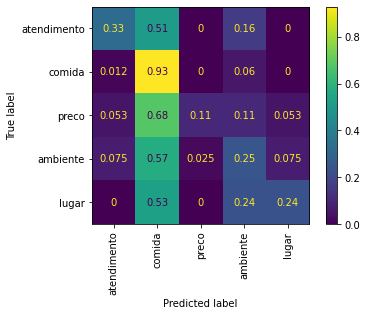

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true',display_labels=['atendimento', 'comida', 'preco', 'ambiente', 'lugar'],xticks_rotation='vertical')

## Avaliação com my_word_vectors gerado no pré-processamento do dataset

In [49]:
GAMMA = .03
N_ASPECT_WORDS = 200

scores = defaultdict(dict)
r = Reach.load("/content/my_word_vectors.vec",unk_word="<UNK>")

aspects = [[x] for x in json.load(open("/content/aspect_words.json"))]
aspects = aspects[:N_ASPECT_WORDS]
instances = ["a comida estava deliciosa e muito bem temperada".lower().split(), 
              "o atendimento estava incrível, recomendo demais".lower().split(), 
              "um ambiente de otima qualidade".lower().split(),
              "o lugar é muito bem localizado".lower().split(),
              "achei o preco um pouco caro mas vale a pena".lower().split()]
#instances = df['text'][5:10]
print(instances)
label_set = ['atendimento', 'comida', 'preco', 'ambiente', 'lugar']
#[i.lower().split() for i in instances]
s = get_scores(instances,
               aspects,
               r,
               label_set,
               gamma=GAMMA,
               remove_oov=False,
               attention_func=rbf_attention)

pred = s.argmax(1)
print(s)
print(pred)

[['a', 'comida', 'estava', 'deliciosa', 'e', 'muito', 'bem', 'temperada'], ['o', 'atendimento', 'estava', 'incrível,', 'recomendo', 'demais'], ['um', 'ambiente', 'de', 'otima', 'qualidade'], ['o', 'lugar', 'é', 'muito', 'bem', 'localizado'], ['achei', 'o', 'preco', 'um', 'pouco', 'caro', 'mas', 'vale', 'a', 'pena']]
['atendimento', 'comida', 'preco', 'ambiente', 'lugar']
[[0.9547266  0.95819604 0.9406847  0.9333397  0.94423556]
 [0.9700805  0.94707143 0.9397762  0.93460137 0.94361514]
 [0.943849   0.9407705  0.94308615 0.9519595  0.94289553]
 [0.94415426 0.9342752  0.94304526 0.9306154  0.9592436 ]
 [0.9499382  0.9430925  0.9535146  0.9381563  0.9412436 ]]
[1 0 3 4 2]


In [47]:
GAMMA = .03
N_ASPECT_WORDS = 200

scores = defaultdict(dict)
r = Reach.load("/content/my_word_vectors.vec",unk_word="<UNK>")

aspects = [[x] for x in json.load(open("/content/aspect_words.json"))]
aspects = aspects[:N_ASPECT_WORDS]
instances = df_tst['text']
label_set = ['atendimento', 'comida', 'preco', 'ambiente', 'lugar']
s = get_scores([i.lower().split() for i in instances],
               aspects,
               r,
               label_set,
               gamma=GAMMA,
               remove_oov=False,
               attention_func=rbf_attention)

y_pred = s.argmax(1)
print(y_pred)

['atendimento', 'comida', 'preco', 'ambiente', 'lugar']
[0 4 0 0 3 0 0 0 4 4 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 2 0 0 2 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 2 0 0 1 3 0 0 0 3 0 0 0 2
 0 0 0 0 0 1 0 2 0 0 0 0 0 1 0 0 3 0 0 0 0 0 0 0 0 1 0 0 0 1 2 0 0 0 2 0 0
 0 0 0 0 0 0 4 0 0 0 0 0 0 0 1 0 0 0 0 0 4 0 4 0 2 0 0 0 0 4 2 3 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 4 4 0 0 0 0 0 0 0 0 0 1 1 2 0 2 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
accuracy_score(y_true, y_pred)

0.3399014778325123

In [50]:
print(classification_report(y_true, y_pred,target_names=label_set))

              precision    recall  f1-score   support

 atendimento       0.26      0.93      0.41        43
      comida       0.63      0.20      0.31        84
       preco       0.55      0.32      0.40        19
    ambiente       0.80      0.10      0.18        40
       lugar       0.22      0.12      0.15        17

    accuracy                           0.34       203
   macro avg       0.49      0.33      0.29       203
weighted avg       0.54      0.34      0.30       203



In [51]:
f1_score = precision_recall_fscore_support(y_true, y_pred)
f1_macro = precision_recall_fscore_support(y_true,y_pred,average="weighted")
print(f1_score)
print()
print(f1_macro)

(array([0.26490066, 0.62962963, 0.54545455, 0.8       , 0.22222222]), array([0.93023256, 0.20238095, 0.31578947, 0.1       , 0.11764706]), array([0.41237113, 0.30630631, 0.4       , 0.17777778, 0.15384615]), array([43, 84, 19, 40, 17]))

(0.5439459680153902, 0.3399014778325123, 0.29944918334537957, None)


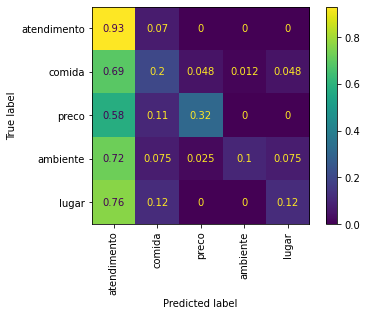

In [61]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true',display_labels=['atendimento', 'comida', 'preco', 'ambiente', 'lugar'],xticks_rotation='vertical')

# Avaliações com o dataset de TVs

## Pré processamento das labels

In [76]:
df['labels'] =-1
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,text,aspectsClass,labels
0,Excelente smart tv. E foi entregue vem antes d...,entrega,-1
1,"Imagem ótima recursos de web bons , recomendo ...",produto,-1
3,"Muito bom o produto, esta tv está entre as das...",funcionalidades,-1
11,Todos os aparelhos samsung são de uma qualidad...,produto,-1
12,"Atendeu todas as expectativas, recomendo Samsu...",produto,-1


In [77]:
df['aspectsClass'].unique()

array(['entrega', 'produto', 'funcionalidades', 'desempenho', 'peso',
       'inicialização', 'design', 'usabilidade', 'conexão', 'tamanho',
       'funcionamento', 'imagem', 'manuseio', 'instalação', 'resolução',
       'configuração', 'conexão wifi', 'explorer', 'processamento',
       'consumo', 'entrega, produto', 'entrega:produto',
       'acesso a internet', 'estrutura', 'processador', 'som',
       'velocidade', 'desgin', 'desempenho-', 'tv', 'produto-'],
      dtype=object)

In [78]:
df.loc[df["aspectsClass"] == "produto", "labels"] = 0
df.loc[df["aspectsClass"] == "entrega", "labels"] = 1
df.loc[df["aspectsClass"] == "imagem", "labels"] = 2
df.loc[df["aspectsClass"] == "desempenho", "labels"] = 3
df.loc[df["aspectsClass"] == "som", "labels"] = 4

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [79]:
df_tst = df[df['labels'] != -1]
df_tst.head(10)

,text,aspectsClass,labels
0,Excelente smart tv. E foi entregue vem antes d...,entrega,1
1,"Imagem ótima recursos de web bons , recomendo ...",produto,0
11,Todos os aparelhos samsung são de uma qualidad...,produto,0
12,"Atendeu todas as expectativas, recomendo Samsu...",produto,0
13,"Rapidez, Boa qualidade e preocupação em manter...",desempenho,3
14,"ÓTIMA IMAGEM, FÁCIL ACESSO À INTERNET COM WIFI...",produto,0
18,"Produto Não Deixa nada a desejar, exelente, go...",produto,0
28,Produto excelente!! Recomendo produto alem de ...,entrega,1
29,"Recomendo, tem muitas funções praticas, o wi-f...",produto,0
30,"Maravilhosa.Chegou dentro do prazo estipulado,...",produto,0


In [80]:
y_true = df_tst['labels']

## Avaliações com word2vec cbow_s50

In [87]:
GAMMA = .03
N_ASPECT_WORDS = 200

scores = defaultdict(dict)
r = Reach.load("/content/cbow_s50.txt",unk_word="<UNK>")

aspects = [[x] for x in json.load(open("/content/aspect_words.json"))]
aspects = aspects[:N_ASPECT_WORDS]
instances = df_tst['text']
# instances = ["a comida estava deliciosa e muito bem temperada".lower().split(), 
#               "o atendimento estava incrível, recomendo demais".lower().split(), 
#               "um ambiente de otima qualidade".lower().split(),
#               "o lugar é muito bem localizado".lower().split(),
#               "achei o preco um pouco caro mas vale a pena".lower().split()]
#instances = df['text'][5:10]
#print(instances)
label_set = ['produto', 'entrega', 'imagem', 'desempenho', 'som']
#[i.lower().split() for i in instances]
s = get_scores([i.lower().split() for i in instances],
               aspects,
               r,
               label_set,
               gamma=GAMMA,
               remove_oov=False,
               attention_func=rbf_attention)

y_pred = s.argmax(1)
#print(s)
print(y_pred)

['produto', 'entrega', 'imagem', 'desempenho', 'som']
[1 2 4 1 2 4 1 0 4 4 0 0 0 4 1 4 0 0 1 4 2 1 2 0 0 1 4 0 2 2 4 4 4 2 4 1 4
 2 1 3 4 4 4 0 4 2 1 0 0 4 0 4 0 2 2 1 0 4 4 4 2 0 4 1 0 4 4 4 0 4 0 4 4 4
 1 2 1 2 3 4 1 4 4 4 4 4 0 0 4 4 4 0 0 2 4 4 4 4 4 4 1 1 1 4 2 4 1 4 1 4 4
 3 4 3 0 2 4 0 1 1 2 4 1 4 4 4 2 1 4 4 4 4 3 1 2 4 4 2 4 1 2 1 1 2 0 4 4 3
 4 0 0 4 4 3 1 2 2 2 4 4 0 4 4 0 1 0 4 1 0 4 4 1 0 4 4 1 1 1 0 2 4 2 1 1 0
 4 1 4 0 0 4 1 2 1 4 4 4 4 4 0 4 4 0 4 0 4 4 1 0 4 4 0 4 2 0 4 1 4 4 1 4 2
 1 0 1 0 2 2 4 3 4 2 0 1 0 2 1 4 2 4 2 0 4 4 4 0 0 2 0 0 1 0 0 4 4 4 0 2 4
 4 2 4 4 1 4 4 4 4 4 4 2 0 1 2 4 4 0 4 2 2 2 4 4 2 1 2 4 0 4 4 2 1 4 4 1 0
 1 4 0 4 4 4 0 0 2 0 4 2 4 0 0 2 4 1 2 0 2 2 4 4 4 0 4 4 4 4 2 4 4 1 4 4 2
 1 4 2 2 0 4 0 0 4 4 4 2 1 4 4 1 0 4 4 4 0 4 0 1 3 1 4 4 0 4 4 2 1 4 2 1 2
 4 4 4 0 4 0 3 4 1 4 0 0 4 2 2 4 4 4 0 1 4 1 2 4 4 1 4 2 4 4 4 1 4 2 2 4 0
 4 4 4 4 4 2 2 3 4 4 1 4 4 4 4 2 2 4 4 0 1 4 2 1 4 0 4 2 4 4 4 4 2 2 1 4 4
 0 4 4 3 0 0 4 2 0 4 4 0 4 4 4 4 4 4 4 4 4 4 4

In [88]:
accuracy_score(y_true, y_pred)

0.17938144329896907

In [89]:
print(classification_report(y_true, y_pred,target_names=label_set,zero_division=1))

              precision    recall  f1-score   support

     produto       0.69      0.17      0.27       360
     entrega       0.35      0.25      0.29       102
      imagem       0.00      0.00      0.00         3
  desempenho       0.00      0.00      0.00        19
         som       0.00      1.00      0.01         1

    accuracy                           0.18       485
   macro avg       0.21      0.28      0.11       485
weighted avg       0.59      0.18      0.26       485



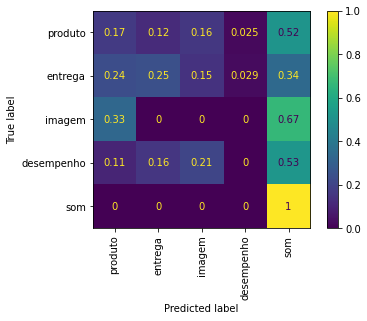

In [90]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true',display_labels=['produto', 'entrega', 'imagem', 'desempenho', 'som'],xticks_rotation='vertical')

## Avaliações com o my_word_vectors gerado

In [91]:
GAMMA = .03
N_ASPECT_WORDS = 200

scores = defaultdict(dict)
r = Reach.load("/content/my_word_vectors.vec",unk_word="<UNK>")

aspects = [[x] for x in json.load(open("/content/aspect_words.json"))]
aspects = aspects[:N_ASPECT_WORDS]
instances = df_tst['text']
# instances = ["a comida estava deliciosa e muito bem temperada".lower().split(), 
#               "o atendimento estava incrível, recomendo demais".lower().split(), 
#               "um ambiente de otima qualidade".lower().split(),
#               "o lugar é muito bem localizado".lower().split(),
#               "achei o preco um pouco caro mas vale a pena".lower().split()]
#instances = df['text'][5:10]
#print(instances)
label_set = ['produto', 'entrega', 'imagem', 'desempenho', 'som']
#[i.lower().split() for i in instances]
s = get_scores([i.lower().split() for i in instances],
               aspects,
               r,
               label_set,
               gamma=GAMMA,
               remove_oov=False,
               attention_func=rbf_attention)

y_pred = s.argmax(1)
#print(s)
print(y_pred)

['produto', 'entrega', 'imagem', 'desempenho', 'som']
[2 2 2 2 2 4 0 0 2 2 0 2 0 2 2 4 0 2 2 2 2 0 4 2 0 2 2 0 2 2 4 2 2 2 2 4 2
 2 1 0 2 2 0 0 2 0 0 2 0 2 2 4 2 2 0 2 0 2 2 2 2 2 4 0 2 2 2 2 0 2 2 0 2 2
 2 2 1 2 0 2 0 2 2 2 2 2 2 0 0 4 2 0 2 2 2 2 2 2 2 4 0 0 0 4 2 2 2 2 2 4 2
 4 2 0 2 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 0 4 4 2
 2 2 0 2 2 4 1 2 0 2 2 2 2 4 2 2 0 0 2 1 2 2 2 2 2 2 2 4 0 2 2 4 2 2 0 2 0
 2 4 2 2 2 2 2 2 2 2 4 2 2 2 0 2 0 0 0 2 2 4 2 2 0 2 0 2 2 0 0 2 2 2 0 2 2
 0 0 2 0 2 2 2 2 4 2 0 2 2 2 0 0 4 0 0 0 2 4 2 0 2 2 0 2 2 4 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 4 4 0 2 2 0 2 2 0 0 4 2 2 2 4 4 2 2 2 2 2 2 2 2 1 2 4 2 0
 2 2 0 2 2 2 2 0 4 2 2 2 2 0 0 2 2 2 2 2 2 2 4 4 4 2 2 2 2 2 0 4 2 2 2 2 2
 2 2 2 2 2 2 0 0 0 2 4 2 0 2 0 2 0 2 0 2 0 4 0 2 2 0 2 2 2 4 0 0 2 4 0 0 2
 0 0 2 2 2 0 2 4 2 2 0 0 2 2 2 2 2 2 2 0 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 4 2 4
 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 2 4 4

In [92]:
accuracy_score(y_true, y_pred)

0.09896907216494845

In [93]:
print(classification_report(y_true, y_pred,target_names=label_set,zero_division=1))

              precision    recall  f1-score   support

     produto       0.52      0.13      0.21       360
     entrega       0.00      0.00      0.00       102
      imagem       0.01      0.67      0.01         3
  desempenho       1.00      0.00      0.00        19
         som       0.00      0.00      0.00         1

    accuracy                           0.10       485
   macro avg       0.31      0.16      0.04       485
weighted avg       0.43      0.10      0.15       485



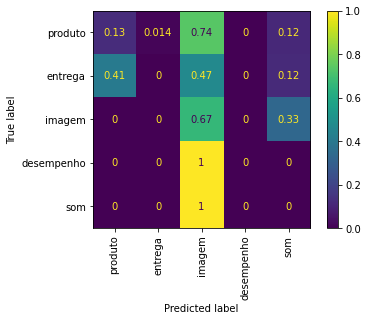

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true',display_labels=['produto', 'entrega', 'imagem', 'desempenho', 'som'],xticks_rotation='vertical')

# Funções auxiliares

In [ ]:
with open('/content/restaurant_textos.txt ', 'w') as textfile:
  textfile.write("\n".join(str(item) for item in sentences))
textfile.close()

In [ ]:
with open('/content/corpus.txt ', 'w') as textfile:
  for item in corpus:
    textfile.write(str(item))
textfile.close()

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def colorize(words, color_array):
    cmap=matplotlib.cm.Blues
    template = '<span class="barcode"; style="color: black; background-color: {}">{}</span>'
    colored_string = ''
    for word, color in zip(words, color_array):
        color = matplotlib.colors.rgb2hex(cmap(color))
        print(color)
        colored_string += template.format(color, '&nbsp' + word + '&nbsp')
    return colored_string

words = instances[0]#['um', 'ambiente', 'de', 'ótima', 'qualidade']
color_array = atts[0][0]

print(color_array)
s = colorize(words, color_array)

# or simply save in an html file and open in browser
with open('/content/colorize.html', 'w') as f:
    f.write(s)

[0.1934354  0.19726068 0.19610389 0.20825753 0.20494252]
#d1e2f3
#d0e2f2
#d0e2f2
#cee0f2
#cfe1f2
